In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import yaml

In [3]:
with open('0_config.yml', 'r', encoding='utf-8') as f:
    dir_config = yaml.load(f.read(), Loader=yaml.FullLoader)
dir_project_workspace = dir_config['dir_project_workspace']

In [4]:
dir_image = dir_project_workspace + 'paper_tomo_SRL-2.0/raw/'
if os.path.exists(dir_image) == False:
    os.makedirs(dir_image)

In [5]:
def func_1(x,b=0):
    return 8./x+0.1+b

In [6]:
def func_2(x,b=0):
    return 5./x+b

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


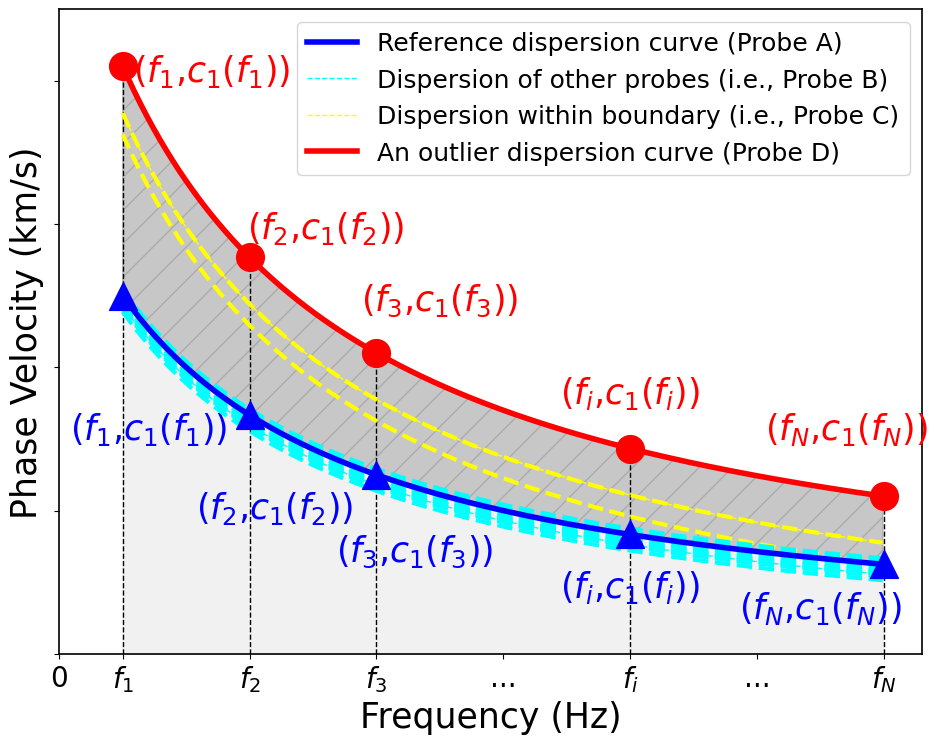

In [14]:
# 横坐标刻度
plt.style.use('tomo_paper.mplstyle')
fig = plt.figure(figsize=(10,8))

x_ticks = [0, r'$f_1$', r'$f_2$', r'$f_3$','...', r'$f_i$', '...', r'$f_N$']
# 对应横坐标刻度的值，这里只是示意位置，可以根据需要自行更改
x_values = [1.5, 2, 3, 4, 5, 6,7,8]
# 纵坐标刻度
y_ticks = []
# 对应纵坐标刻度的值，同样只是示意，可以根据需要自行更改
y_values = [0,1, 2, 3, 4, 5,]

ff = np.arange(2,8,0.01)

cc1 = func_1(ff)
cc2 = func_2(ff)
plt.plot(ff,cc2, c ='b', label = 'Reference dispersion curve (Probe A)',lw = 4,zorder = 9)


for i in range(1,12):
    # 生成随机数，范围0.01，0.04
    b = np.random.uniform(-0.12,0.09)
    cc = func_2(ff,b)
    if i == 1:
        plt.plot(ff,cc, c ='cyan',label = 'Dispersion of other probes (i.e., Probe B)',linestyle = '--',lw = 1)
    plt.plot(ff,cc, c ='cyan',linestyle = '--',lw = 3,zorder = 7)

for i in range(1,3):
    # 生成随机数，范围0.01，0.04
    b = np.random.uniform(-0.5,-0.3)
    cc = func_1(ff,b)
    if i == 1:
        plt.plot(ff,cc, c ='yellow',label = 'Dispersion within boundary (i.e., Probe C)',linestyle = '--',lw = 1)
    plt.plot(ff,cc, c ='yellow',linestyle = '--',lw = 3,zorder = 6)

plt.plot(ff,cc1, c ='r', label = 'An outlier dispersion curve (Probe D)' ,lw = 4,zorder = 8)



cc_min = []
cc_max = []
for i in range(len(cc1)):
    cc_max.append(max(cc1[i],cc2[i]))
    cc_min.append(min(cc1[i],cc2[i]))
plt.fill_between(ff,0,cc_max,color = 'lightgray',alpha = 0.3)
plt.fill_between(ff,cc_min,cc_max,color = 'dimgray',alpha = 0.3,hatch = '/')

for i in range(1,8):
    if i != 4 and i != 6:
        plt.vlines(x_values[i],0,max(func_1(x_values[i]),func_2(x_values[i])), linestyles='--',lw = 1,color = 'k')
        plt.scatter(x_values[i],func_1(x_values[i]),marker = 'o',color = 'r',zorder = 10)
        plt.scatter(x_values[i],func_2(x_values[i]),marker = '^',color = 'b',zorder = 10)

plt.text(2.7, 4., r'($f_1$,$c_1(f_1)$)',  color='red', ha='center')
plt.text(3.6, 2.9, r'($f_2$,$c_1(f_2)$)',  color='red', ha='center')
plt.text(4.5, 2.4, r'($f_3$,$c_1(f_3)$)',  color='red', ha='center')
plt.text(6, 1.75, r'($f_i$,$c_1(f_i)$)', color='red', ha='center')
plt.text(7.7, 1.5, r'($f_N$,$c_1(f_N)$)',  color='red', ha='center')

plt.text(2.2, 1.5, r'($f_1$,$c_1(f_1)$)',  color='b', ha='center')
plt.text(3.2, 0.95, r'($f_2$,$c_1(f_2)$)',  color='b', ha='center')
plt.text(4.3, 0.65, r'($f_3$,$c_1(f_3)$)', color='b', ha='center')
plt.text(6, 0.4, r'($f_i$,$c_1(f_i)$)',  color='b', ha='center')
plt.text(7.5, 0.25, r'($f_N$,$c_1(f_N)$)',  color='b', ha='center')
# 设置横坐标刻度及标签
plt.xticks(x_values, x_ticks)
# 设置纵坐标刻度及标签
plt.yticks(y_values, y_ticks)
# 添加横坐标标签
plt.xlabel('Frequency (Hz)')
# 添加纵坐标标签
plt.ylabel('Phase Velocity (km/s)')
plt.ylim([0,4.5])
plt.legend()
plt.tight_layout()
plt.savefig(dir_image+'pstworkflow_dispersions.eps')